In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [59]:
df = pd.read_csv('C:/Users/vdzit/Desktop/NBA_player_of_the_week.csv', sep=",")

In [ ]:
df

In [56]:
a = df['Position'].unique()
print(a)


['SG' 'F' 'FC' 'SF' 'C' 'G' 'PF' 'GF' 'PG' 'G-F' 'F-C']


In [7]:
df.shape

(1344, 17)

In [ ]:
df.dtypes

### Удаление строк, содержащих пропуски данных

In [9]:
#Простое удаление строк
df1 = df.mask(np.random.random(df.shape) < 0.02)
df1 = df1.dropna(axis=1, how='any')

In [ ]:
#Заполнение всех пустых значений нулями
df2 = df.mask(np.random.random(df.shape) < 0.02)
df2 = df2.fillna(0)

#### Кодирование категориальных признаков

In [ ]:
cat_enc = pd.DataFrame({'Team':df['Team']})
cat_enc

In [ ]:
conferences = ['West', 'East']

In [62]:
df3 = df.copy()
df3['Conference_code'] = df3['Conference'].map({'West':1,'East':2})
df3['Conference_decode'] = df3['Conference_code'].map({1:'West',2:'East'})
df3.pop('Conference')

temp_columns = df3[['Conference_code', 'Conference_decode']]

df3 = df3.drop(columns=['Conference_code', 'Conference_decode'])

# Вставляем их обратно на нужную позицию
df3.insert(2, 'Conference_code', temp_columns['Conference_code'])
df3.insert(3, 'Conference_decode', temp_columns['Conference_decode'])


df3['Position_code'] = df3['Position'].map({'SG':2, 'F':3, 'FC':4, 'SF':3, 'C':5, 'G':1, 'PF':4, 'GF':3, 'PG':2, 'G-F':3, 'F-C':4})
df3['Position_decode'] = df3['Position_code'].map({2:'SG', 3:'F', 4:'FC', 3:'SF', 5:'C', 1:'G', 4:'PF', 3:'GF', 2:'PG', 3:'G-F', 4:'F-C'})
df3.pop('Position')

temp_columns = df3[['Position_code','Position_decode']]

df3 = df3.drop(columns = ['Position_code', 'Position_decode'])

df3.insert(5, 'Position_code', temp_columns['Position_code'])
df3.insert(6, 'Position_decode', temp_columns['Position_decode'])


In [ ]:
df3

In [64]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [66]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df3[['Weight']])

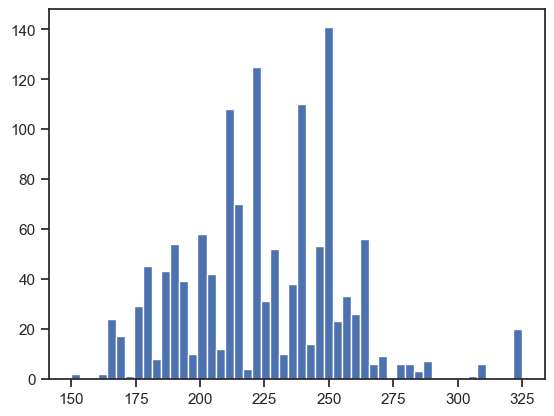

In [67]:
plt.hist(df3['Weight'], 50)
plt.show()

In [70]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(df3[['Weight']])

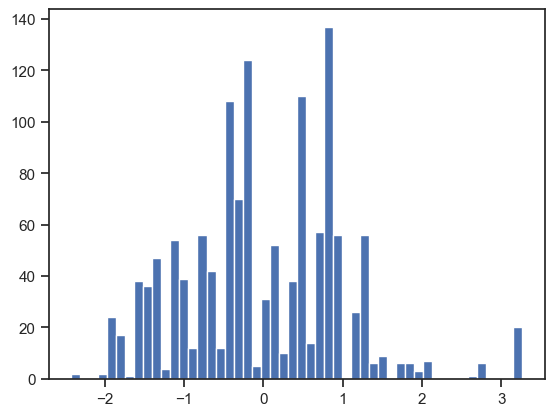

In [71]:
plt.hist(sc2_data, 50)
plt.show()